<a href="https://colab.research.google.com/github/JCARNEIROX/IC-Marcos-Rider/blob/main/%5BOpenDSS%5D_Modelagem_LabREI%2C_algoritmo_heur%C3%ADstico%2C_mudan%C3%A7a_das_constantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importa bibliotecas

In [2]:
# pip install "OpenDSSDirect.py"
# pip install dss_python


In [ ]:
from dss import DSS
import opendssdirect as DSS1
import matplotlib.pyplot as plt
import math
import numpy as np
import csv
import pandas as pd
from google.colab import drive
import pickle
import os

Text = DSS.Text
Circuit = DSS.ActiveCircuit
Solution = DSS.ActiveCircuit.Solution

#Encontra Vmed e kmax/kmin que minimiza diferença quadrática




In [ ]:
#______________________________________________________________________________#
#                             OPERAÇÃO SEM BATERIA                             #
#______________________________________________________________________________#

# Índice
idx = 0

# Definição das matrizes de multiplicadores de potência ativa (índice 0) e reativa (índice 1) dos elementos
carga_a = [[0.4873,0.4837,0.4167,0.3613,0.3910,0.3842,0.5055,0.5097,0.7013,0.8342,0.7933,0.5522,0.5543,0.5182,0.5194,0.5867,0.5829,0.8999,0.9643,1.0581,1.0000,0.9892,0.8910,0.8344],[0.0868,0.6062,0.5977,0.4528,0.9950,0.9053,1.0968,0.8239,1.2622,1.1966,0.7084,0.2954,0.4950,0.2772,0.2778,0.2091,0.0000,0.3207,0.6883,0.7552,0.7138,0.8834,0.1587,0.2974]]
carga_b = [[0.5253,0.4183,0.3515,0.3325,0.3219,0.3793,0.4764,0.5153,0.5313,0.7729,0.7917,0.5897,0.5543,0.5201,0.5213,0.5880,0.6317,0.9094,0.9404,0.9625,0.9735,0.9349,0.8633,0.8174],[0.2810,0.5243,0.5042,0.4770,1.0044,1.1102,1.1225,1.1180,1.1330,1.1087,1.1357,0.5266,0.5946,0.0000,0.0000,0.0000,0.0000,0.8121,0.5030,1.2063,0.8693,1.0029,0.6162,0.4373]]
carga_c = [[0.5259,0.4593,0.3930,0.3452,0.3542,0.3642,0.4829,0.5000,0.6752,0.8168,0.7667,0.5592,0.5552,0.5389,0.5402,0.6072,0.6117,0.8643,0.9596,0.9794,0.9671,0.9494,0.8302,0.8185],[0.0937,0.0818,0.0700,0.1230,0.3163,0.9268,0.7806,0.8998,0.4819,0.4369,0.8225,0.7008,0.4958,0.0960,0.0962,0.1082,0.3272,0.4623,0.3420,0.0000,0.3447,0.1691,0.0000,0.0000]]

pv = [0, 0, 0, 0, 0.4, 0.7, 0.8, 0.96, 0.97, 0.99, 1, 0.97, 0.95, 0.8, 0.7, 0.4, 0.1, 0, 0, 0, 0, 0, 0, 0]

# Vetores para armazenar resultados
horas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
carga_kw_l = []
carga_kvar_l = []
pv6_kw_l = []
circuit_kw_l = []
circuit_kvar_l = []

carga_v_a = []
carga_v_b = []
carga_v_c = []
ders_v_a = []
ders_v_b = []
ders_v_c = []

tensoes_minimas = []

# Simulação

while idx < 24:
  DSS.ClearAll()

  Text.Command = ('New Circuit.Circuito bus1=bus_001.1.2.3 basekV=0.22')

  # Dados dos cabos e geometria das linhas
  Text.Command = ('New WireData.Fios Rdc=0.52 Rac=0.63 Runits=km Radius=3.338 Radunits=mm')
  Text.Command = ('New LineSpacing.N1 Nconds=3 Nphases=3 Units=cm X=[ -120.00  0.00  60.00] H=[ 1000.00  1000.00  1000.00]')
  Text.Command = ('New LineGeometry.Geometria  Nconds=3  Spacing=N1 Wires=[ Fios, Fios, Fios ] Reduce=n')

  # Linhas
  Text.Command = ('New Line.Line_001_002 bus1=bus_001 bus2=bus_002 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_002_003 bus1=bus_002 bus2=bus_003 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_003_004 bus1=bus_003 bus2=bus_004 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_004_005 bus1=bus_004 bus2=bus_005 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_005_006 bus1=bus_005 bus2=bus_006 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_006_007 bus1=bus_006 bus2=bus_007 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_007_008 bus1=bus_007 bus2=bus_008 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_008_009 bus1=bus_008 bus2=bus_009 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_009_010 bus1=bus_009 bus2=bus_010 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_010_011 bus1=bus_010 bus2=bus_011 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_011_012 bus1=bus_011 bus2=bus_012 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_012_013 bus1=bus_012 bus2=bus_013 Length=25 Units=m Geometry=Geometria phases=3')

  # Loads
  Text.Command = (f'New Load.cargaA bus=bus_013.1 phases = 1 kv=0.22 kw={3.95251*carga_a[0][idx]: .2f} kvar={0.38724*carga_a[1][idx]: .2f} conn=y')
  Text.Command = (f'New Load.cargaB bus=bus_013.2 phases = 1 kv=0.22 kw={3.95251*carga_b[0][idx]: .2f} kvar={0.38724*carga_b[1][idx]: .2f} conn=y')
  Text.Command = (f'New Load.cargaC bus=bus_013.3 phases = 1 kv=0.22 kw={3.95251*carga_c[0][idx]: .2f} kvar={0.38724*carga_c[1][idx]: .2f} conn=y')

  # Gerador PV
  Text.Command = (f'New Generator.pv6 bus1=bus_006.1.2.3 phases=3 kv=0.22 kw={8*pv[idx]} kvar=0 conn=y')

  # Resolve
  Text.Command = ("Set VoltageBases = [.22]")
  Text.Command = ("CalcVoltageBases")
  Text.Command = ("Set maxiterations = 500")
  Text.Command = ('set mode = snap')
  Text.Command = ("Solve")


  if Solution.Converged == False:
    print('Warning: Solution didn\'t converge!', flush=True)

  vmag = DSS1.Circuit.AllBusVMag()
  vname = DSS1.Circuit.AllBusNames()

  # Tensões nos barramentos
  tensoes = np.array(vmag).reshape((len(vname),3))
  #print(vmag.index(min(vmag)))

  #Armazena resultados
  carga_kw_l.append(3.95251*(carga_a[0][idx]+carga_b[0][idx]+carga_c[0][idx])/3)
  carga_kvar_l.append(0.38724*(carga_a[1][idx]+carga_b[1][idx]+carga_c[1][idx])/3)
  pv6_kw_l.append(8*pv[idx])
  circuit_kw_l.append(DSS1.Circuit.TotalPower()[0])
  circuit_kvar_l.append(DSS1.Circuit.TotalPower()[1])

  carga_v_a.append(tensoes[12][0])
  carga_v_b.append(tensoes[12][1])
  carga_v_c.append(tensoes[12][2])
  ders_v_a.append(tensoes[5][0])
  ders_v_b.append(tensoes[5][1])
  ders_v_c.append(tensoes[5][2])

  tensoes_minimas.append(min(vmag))
  #print('Vmag: ', vmag, ' Vmin: ', min(vmag))
  idx = idx + 1

# Transforma listas em np array
carga_kw = np.array(carga_kw_l)
carga_kvar = np.array(carga_kvar_l)
pv6_kw = -np.array(pv6_kw_l)
circuit_kw = -np.array(circuit_kw_l)
circuit_kvar = -np.array(circuit_kvar_l)

#Calcula Vmed
Vmed = sum(tensoes_minimas)/len(tensoes_minimas)
print(Vmed)

126.2651529278951


In [ ]:
#______________________________________________________________________________#
#                         FUNÇÃO - OPERAÇÃO BATERIA                            #
#______________________________________________________________________________#


def operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd):
  # Vmin: tensão mínima do sistema em t [V]
  # SoC: fração da capacidade da bateria em t [adimensional, entre 0 e 1]
  # Pmin: mínima potência da bateria para ela operar [kW]
  # Pant: potência da bateria no instante anterior [kW]

  # Retorna lista: [potência da bateria para t+1 [kW], SoC atualizado [adimensional, entre 0 e 1]]

  deltaV = Vmin - Vmed
  if deltaV >= 0:
    # Tensão mínima do sistema maior que média das tensões mínimas
    # Carregamento da bateria para diminuir tensão mínima
    Pbess = deltaV/kc
    Pseg = Pbess + Pant
    if Pseg < Pmin:
      return [0, SoC]   # Se a operação definida for menor que a potência mínima, a bateria não opera
    elif SoC*12 + Pseg > 0.9*12:
      Pseg = 0.9*12 - SoC*12 # Se ultrapassasse 90% da capacidade, a bateria opera de modo a alcançar 90% da capacidade
      if Pseg > 3.2: #Se ultrapassar a potência máxima da bateria, fornece potência máxima
        Pseg = 3.2
      return [Pseg, SoC + Pseg/12]
    else:
      if Pseg > 3.2:
        Pseg = 3.2
      return [Pseg, SoC + Pseg/12] # Operação normal
  else:
    # Tensão mínima do sistema menor que média das tensões mínimas
    # Descarga da bateria para aumentar tensão mínima
    Pbess = deltaV/kd
    Pseg = Pbess + Pant
    if abs(Pseg) < Pmin:
      return [0, SoC]
    elif SoC*12 + Pseg < 0.1*12:
      Pseg = 0.1*12 - SoC*12  # Se ficasse abaixo de 10% da capacidade, a bateria opera de modo a ficar com 10% da capacidade
      if abs(Pseg) > 3.2:
        Pseg = -3.2
      return [Pseg, SoC + Pseg/12]
    else:
      if abs(Pseg) > 3.2:
        Pseg = -3.2
      return [Pseg, SoC + Pseg/12] # Operação normal

In [ ]:
#______________________________________________________________________________#
#                               CÁLCULO DE KC                                  #
#______________________________________________________________________________#

erros = []
Vmed = 126.2651529278951
kcs = []
kd = 1

for kc in np.arange(0.15, 0.2, 0.001):
  kcs.append(kc)

  # Índice
  idx = 0

  # Condições bateria
  SoC = 0.10
  Pmin = 0.320
  Lista_SoC = [SoC]

  # Definição das matrizes de multiplicadores de potência ativa (índice 0) e reativa (índice 1) dos elementos
  carga_a = [[0.4873,0.4837,0.4167,0.3613,0.3910,0.3842,0.5055,0.5097,0.7013,0.8342,0.7933,0.5522,0.5543,0.5182,0.5194,0.5867,0.5829,0.8999,0.9643,1.0581,1.0000,0.9892,0.8910,0.8344],[0.0868,0.6062,0.5977,0.4528,0.9950,0.9053,1.0968,0.8239,1.2622,1.1966,0.7084,0.2954,0.4950,0.2772,0.2778,0.2091,0.0000,0.3207,0.6883,0.7552,0.7138,0.8834,0.1587,0.2974]]
  carga_b = [[0.5253,0.4183,0.3515,0.3325,0.3219,0.3793,0.4764,0.5153,0.5313,0.7729,0.7917,0.5897,0.5543,0.5201,0.5213,0.5880,0.6317,0.9094,0.9404,0.9625,0.9735,0.9349,0.8633,0.8174],[0.2810,0.5243,0.5042,0.4770,1.0044,1.1102,1.1225,1.1180,1.1330,1.1087,1.1357,0.5266,0.5946,0.0000,0.0000,0.0000,0.0000,0.8121,0.5030,1.2063,0.8693,1.0029,0.6162,0.4373]]
  carga_c = [[0.5259,0.4593,0.3930,0.3452,0.3542,0.3642,0.4829,0.5000,0.6752,0.8168,0.7667,0.5592,0.5552,0.5389,0.5402,0.6072,0.6117,0.8643,0.9596,0.9794,0.9671,0.9494,0.8302,0.8185],[0.0937,0.0818,0.0700,0.1230,0.3163,0.9268,0.7806,0.8998,0.4819,0.4369,0.8225,0.7008,0.4958,0.0960,0.0962,0.1082,0.3272,0.4623,0.3420,0.0000,0.3447,0.1691,0.0000,0.0000]]

  pv = [0, 0, 0, 0, 0.4, 0.7, 0.8, 0.96, 0.97, 0.99, 1, 0.97, 0.95, 0.8, 0.7, 0.4, 0.1, 0, 0, 0, 0, 0, 0, 0]
  bateria = [0]

  # Vetores para armazenar resultados
  horas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
  carga_kw_l = []
  carga_kvar_l = []
  bateria_kw_l = []
  bateria_kvar_l = []
  pv6_kw_l = []
  circuit_kw_l = []
  circuit_kvar_l = []

  carga_v_a = []
  carga_v_b = []
  carga_v_c = []
  ders_v_a = []
  ders_v_b = []
  ders_v_c = []

  tensoes_minimas_m = []

  # Simulação

  while idx < 24:
    DSS.ClearAll()

    Text.Command = ('New Circuit.Circuito bus1=bus_001.1.2.3 basekV=0.22')

    # Dados dos cabos e geometria das linhas
    Text.Command = ('New WireData.Fios Rdc=0.52 Rac=0.63 Runits=km Radius=3.338 Radunits=mm')
    Text.Command = ('New LineSpacing.N1 Nconds=3 Nphases=3 Units=cm X=[ -120.00  0.00  60.00] H=[ 1000.00  1000.00  1000.00]')
    Text.Command = ('New LineGeometry.Geometria  Nconds=3  Spacing=N1 Wires=[ Fios, Fios, Fios ] Reduce=n')

    # Linhas
    Text.Command = ('New Line.Line_001_002 bus1=bus_001 bus2=bus_002 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_002_003 bus1=bus_002 bus2=bus_003 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_003_004 bus1=bus_003 bus2=bus_004 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_004_005 bus1=bus_004 bus2=bus_005 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_005_006 bus1=bus_005 bus2=bus_006 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_006_007 bus1=bus_006 bus2=bus_007 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_007_008 bus1=bus_007 bus2=bus_008 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_008_009 bus1=bus_008 bus2=bus_009 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_009_010 bus1=bus_009 bus2=bus_010 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_010_011 bus1=bus_010 bus2=bus_011 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_011_012 bus1=bus_011 bus2=bus_012 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_012_013 bus1=bus_012 bus2=bus_013 Length=25 Units=m Geometry=Geometria phases=3')

    # Loads
    Text.Command = (f'New Load.cargaA bus=bus_013.1 phases = 1 kv=0.22 kw={3.95251*carga_a[0][idx]: .2f} kvar={0.38724*carga_a[1][idx]: .2f} conn=y')
    Text.Command = (f'New Load.cargaB bus=bus_013.2 phases = 1 kv=0.22 kw={3.95251*carga_b[0][idx]: .2f} kvar={0.38724*carga_b[1][idx]: .2f} conn=y')
    Text.Command = (f'New Load.cargaC bus=bus_013.3 phases = 1 kv=0.22 kw={3.95251*carga_c[0][idx]: .2f} kvar={0.38724*carga_c[1][idx]: .2f} conn=y')
    Text.Command = (f'New Load.bateria6 bus=bus_006.1.2.3 phases=3 kv=0.22 kw={1*bateria[idx]: .2f} kvar=0 conn=y')

    # Gerador PV
    Text.Command = (f'New Generator.pv6 bus1=bus_006.1.2.3 phases=3 kv=0.22 kw={8*pv[idx]} kvar=0 conn=y')

    # Resolve
    Text.Command = ("Set VoltageBases = [.22]")
    Text.Command = ("CalcVoltageBases")
    Text.Command = ("Set maxiterations = 500")
    Text.Command = ('set mode = snap')
    Text.Command = ("Solve")


    if Solution.Converged == False:
      print('Warning: Solution didn\'t converge!', flush=True)

    vmag = DSS1.Circuit.AllBusVMag()
    vname = DSS1.Circuit.AllBusNames()

    if idx < 23:
      Pant = bateria[idx]
      Vmin = min(vmag)
      bateria.append(operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[0])
      Lista_SoC.append(operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[1])
      SoC = operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[1]

    # Tensões nos barramentos
    tensoes = np.array(vmag).reshape((len(vname),3))

    #Armazena resultados
    carga_kw_l.append(3.95251*(carga_a[0][idx]+carga_b[0][idx]+carga_c[0][idx])/3)
    carga_kvar_l.append(0.38724*(carga_a[1][idx]+carga_b[1][idx]+carga_c[1][idx])/3)
    bateria_kw_l.append(1*bateria[idx])
    #bateria_kvar_l.append(0.20975*bateria[1][idx])
    pv6_kw_l.append(8*pv[idx])
    circuit_kw_l.append(DSS1.Circuit.TotalPower()[0])
    circuit_kvar_l.append(DSS1.Circuit.TotalPower()[1])
    tensoes_minimas_m.append(min(vmag))


    carga_v_a.append(tensoes[12][0])
    carga_v_b.append(tensoes[12][1])
    carga_v_c.append(tensoes[12][2])
    ders_v_a.append(tensoes[5][0])
    ders_v_b.append(tensoes[5][1])
    ders_v_c.append(tensoes[5][2])

    idx = idx + 1

  # Transforma listas em np array
  carga_kw = np.array(carga_kw_l)
  carga_kvar = np.array(carga_kvar_l)
  bateria_kw = np.array(bateria_kw_l)
  #bateria_kvar = np.array(bateria_kvar_l)
  pv6_kw = -np.array(pv6_kw_l)
  circuit_kw = -np.array(circuit_kw_l)
  circuit_kvar = -np.array(circuit_kvar_l)

  #print(bateria_kw)
  #print((bateria_kw+pv6_kw)*1000)

  erro_quad = 0
  for i in range(24):
    erro_quad += (Vmed - tensoes_minimas_m[i])**2
  #print("Erro = ", erro_quad)
  erros.append(erro_quad)

print("Lista de erros: ", erros)
print("Erro mínimo: ", min(erros))
print("Posição: ", erros.index(min(erros)))
indice = erros.index(min(erros))
kc = kcs[indice]

print('Constante de carregamento ótima = ', kc)

Lista de erros:  [8.626070662556431, 8.626070662556431, 8.626070662556431, 8.624062550724188, 8.622777406438638, 8.621535137158716, 8.620335740705888, 8.619179214904028, 8.618065557582112, 8.61699476656859, 8.616475445249703, 8.615468949634028, 8.614505314912472, 8.613584538921401, 8.612706619502655, 8.611871554497943, 8.61147009172783, 8.61069930430747, 8.609971365918144, 8.609286274414504, 8.608959795573423, 8.60833897037336, 8.607760986696428, 8.607488059760971, 8.606974334358316, 8.60673353535783, 8.606284063422986, 8.605877424465854, 8.605690166688257, 8.605347773206416, 8.605192636968608, 8.604914484175682, 8.60479146708993, 8.604577550208807, 8.60448664988542, 8.60440645462141, 8.604278178207663, 8.604230096531351, 8.604166044915582, 8.60415007445085, 8.60414480719481, 8.604166381258016, 8.604193222051595, 8.604230765000949, 8.604337956318272, 8.60440760416109, 8.604487953108942, 8.604579002901174, 8.604793203969328, 8.604916354720611, 8.60505020526783]
Erro mínimo:  8.604144807

In [ ]:
#______________________________________________________________________________#
#                               CÁLCULO DE KD                                  #
#______________________________________________________________________________#

erros = []
Vmed = 126.2651529278951
kds = []

for kd in np.arange(0.7, 0.76, 0.001):
  kds.append(kd)

  # Índice
  idx = 0

  # Condições bateria
  SoC = 0.10
  Pmin = 0.320
  Lista_SoC = [SoC]

  # Definição das matrizes de multiplicadores de potência ativa (índice 0) e reativa (índice 1) dos elementos
  carga_a = [[0.4873,0.4837,0.4167,0.3613,0.3910,0.3842,0.5055,0.5097,0.7013,0.8342,0.7933,0.5522,0.5543,0.5182,0.5194,0.5867,0.5829,0.8999,0.9643,1.0581,1.0000,0.9892,0.8910,0.8344],[0.0868,0.6062,0.5977,0.4528,0.9950,0.9053,1.0968,0.8239,1.2622,1.1966,0.7084,0.2954,0.4950,0.2772,0.2778,0.2091,0.0000,0.3207,0.6883,0.7552,0.7138,0.8834,0.1587,0.2974]]
  carga_b = [[0.5253,0.4183,0.3515,0.3325,0.3219,0.3793,0.4764,0.5153,0.5313,0.7729,0.7917,0.5897,0.5543,0.5201,0.5213,0.5880,0.6317,0.9094,0.9404,0.9625,0.9735,0.9349,0.8633,0.8174],[0.2810,0.5243,0.5042,0.4770,1.0044,1.1102,1.1225,1.1180,1.1330,1.1087,1.1357,0.5266,0.5946,0.0000,0.0000,0.0000,0.0000,0.8121,0.5030,1.2063,0.8693,1.0029,0.6162,0.4373]]
  carga_c = [[0.5259,0.4593,0.3930,0.3452,0.3542,0.3642,0.4829,0.5000,0.6752,0.8168,0.7667,0.5592,0.5552,0.5389,0.5402,0.6072,0.6117,0.8643,0.9596,0.9794,0.9671,0.9494,0.8302,0.8185],[0.0937,0.0818,0.0700,0.1230,0.3163,0.9268,0.7806,0.8998,0.4819,0.4369,0.8225,0.7008,0.4958,0.0960,0.0962,0.1082,0.3272,0.4623,0.3420,0.0000,0.3447,0.1691,0.0000,0.0000]]

  pv = [0, 0, 0, 0, 0.4, 0.7, 0.8, 0.96, 0.97, 0.99, 1, 0.97, 0.95, 0.8, 0.7, 0.4, 0.1, 0, 0, 0, 0, 0, 0, 0]
  bateria = [0]

  # Vetores para armazenar resultados
  horas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
  carga_kw_l = []
  carga_kvar_l = []
  bateria_kw_l = []
  bateria_kvar_l = []
  pv6_kw_l = []
  circuit_kw_l = []
  circuit_kvar_l = []

  carga_v_a = []
  carga_v_b = []
  carga_v_c = []
  ders_v_a = []
  ders_v_b = []
  ders_v_c = []

  tensoes_minimas_m = []

  # Simulação

  while idx < 24:
    DSS.ClearAll()

    Text.Command = ('New Circuit.Circuito bus1=bus_001.1.2.3 basekV=0.22')

    # Dados dos cabos e geometria das linhas
    Text.Command = ('New WireData.Fios Rdc=0.52 Rac=0.63 Runits=km Radius=3.338 Radunits=mm')
    Text.Command = ('New LineSpacing.N1 Nconds=3 Nphases=3 Units=cm X=[ -120.00  0.00  60.00] H=[ 1000.00  1000.00  1000.00]')
    Text.Command = ('New LineGeometry.Geometria  Nconds=3  Spacing=N1 Wires=[ Fios, Fios, Fios ] Reduce=n')

    # Linhas
    Text.Command = ('New Line.Line_001_002 bus1=bus_001 bus2=bus_002 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_002_003 bus1=bus_002 bus2=bus_003 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_003_004 bus1=bus_003 bus2=bus_004 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_004_005 bus1=bus_004 bus2=bus_005 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_005_006 bus1=bus_005 bus2=bus_006 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_006_007 bus1=bus_006 bus2=bus_007 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_007_008 bus1=bus_007 bus2=bus_008 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_008_009 bus1=bus_008 bus2=bus_009 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_009_010 bus1=bus_009 bus2=bus_010 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_010_011 bus1=bus_010 bus2=bus_011 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_011_012 bus1=bus_011 bus2=bus_012 Length=25 Units=m Geometry=Geometria phases=3')
    Text.Command = ('New Line.Line_012_013 bus1=bus_012 bus2=bus_013 Length=25 Units=m Geometry=Geometria phases=3')

    # Loads
    Text.Command = (f'New Load.cargaA bus=bus_013.1 phases = 1 kv=0.22 kw={3.95251*carga_a[0][idx]: .2f} kvar={0.38724*carga_a[1][idx]: .2f} conn=y')
    Text.Command = (f'New Load.cargaB bus=bus_013.2 phases = 1 kv=0.22 kw={3.95251*carga_b[0][idx]: .2f} kvar={0.38724*carga_b[1][idx]: .2f} conn=y')
    Text.Command = (f'New Load.cargaC bus=bus_013.3 phases = 1 kv=0.22 kw={3.95251*carga_c[0][idx]: .2f} kvar={0.38724*carga_c[1][idx]: .2f} conn=y')
    Text.Command = (f'New Load.bateria6 bus=bus_006.1.2.3 phases=3 kv=0.22 kw={1*bateria[idx]: .2f} kvar=0 conn=y')

    # Gerador PV
    Text.Command = (f'New Generator.pv6 bus1=bus_006.1.2.3 phases=3 kv=0.22 kw={8*pv[idx]} kvar=0 conn=y')

    # Resolve
    Text.Command = ("Set VoltageBases = [.22]")
    Text.Command = ("CalcVoltageBases")
    Text.Command = ("Set maxiterations = 500")
    Text.Command = ('set mode = snap')
    Text.Command = ("Solve")


    if Solution.Converged == False:
      print('Warning: Solution didn\'t converge!', flush=True)

    vmag = DSS1.Circuit.AllBusVMag()
    vname = DSS1.Circuit.AllBusNames()

    if idx < 23:
      Pant = bateria[idx]
      Vmin = min(vmag)
      bateria.append(operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[0])
      Lista_SoC.append(operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[1])
      SoC = operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[1]

    # Tensões nos barramentos
    tensoes = np.array(vmag).reshape((len(vname),3))

    #Armazena resultados
    carga_kw_l.append(3.95251*(carga_a[0][idx]+carga_b[0][idx]+carga_c[0][idx])/3)
    carga_kvar_l.append(0.38724*(carga_a[1][idx]+carga_b[1][idx]+carga_c[1][idx])/3)
    bateria_kw_l.append(1*bateria[idx])
    #bateria_kvar_l.append(0.20975*bateria[1][idx])
    pv6_kw_l.append(8*pv[idx])
    circuit_kw_l.append(DSS1.Circuit.TotalPower()[0])
    circuit_kvar_l.append(DSS1.Circuit.TotalPower()[1])
    tensoes_minimas_m.append(min(vmag))


    carga_v_a.append(tensoes[12][0])
    carga_v_b.append(tensoes[12][1])
    carga_v_c.append(tensoes[12][2])
    ders_v_a.append(tensoes[5][0])
    ders_v_b.append(tensoes[5][1])
    ders_v_c.append(tensoes[5][2])

    idx = idx + 1

  # Transforma listas em np array
  carga_kw = np.array(carga_kw_l)
  carga_kvar = np.array(carga_kvar_l)
  bateria_kw = np.array(bateria_kw_l)
  #bateria_kvar = np.array(bateria_kvar_l)
  pv6_kw = -np.array(pv6_kw_l)
  circuit_kw = -np.array(circuit_kw_l)
  circuit_kvar = -np.array(circuit_kvar_l)

  #print(bateria_kw)
  #print((bateria_kw+pv6_kw)*1000)

  erro_quad = 0
  for i in range(24):
    erro_quad += (Vmed - tensoes_minimas_m[i])**2
  #print("Erro = ", erro_quad)
  erros.append(erro_quad)

print("Lista de erros: ", erros)
print("Erro mínimo: ", min(erros))
print("Posição: ", erros.index(min(erros)))
indice = erros.index(min(erros))
kd = kds[indice]

print('Constante de descarregamento ótima = ', kd)

Lista de erros:  [8.562931967558091, 8.562466643874888, 8.565063560004246, 8.562199316671963, 8.559341441831743, 8.558901514317624, 8.558901514317624, 8.562332107807663, 8.562090236810096, 8.564508108032014, 8.56166933352139, 8.561261087669159, 8.563870711259431, 8.561044666013034, 8.56065544092714, 8.56065544092714, 8.560458100120911, 8.560458100120911, 8.560087893217213, 8.557287296214081, 8.559730341989395, 8.559558439379511, 8.559558439379511, 8.55677056135801, 8.556438383063083, 8.55906707426548, 8.556291911798654, 8.559729380889042, 8.562185018997829, 8.559416213024921, 8.55665376269108, 8.561750747016434, 8.558994651464797, 8.558994651464797, 8.55871314365364, 8.561354550880106, 8.558611162326292, 8.558611162326292, 8.558348658922538, 8.555617973947149, 8.558265740469343, 8.558022238894246, 8.558022238894246, 8.555304254076644, 8.557958380754346, 8.557733878434698, 8.55502859035743, 8.557522025709218, 8.55482308472034, 8.558267430092462, 8.56092791778196, 8.558235323027802, 8.56

# Execução

In [ ]:
#______________________________________________________________________________#
#                          MODELAGEM - OPERAÇÃO BATERIA                        #
#______________________________________________________________________________#

# Índice
idx = 0

# Condições bateria
SoC = 0.10
Pmin = 0.320
Lista_SoC = [SoC]

# Definição das matrizes de multiplicadores de potência ativa (índice 0) e reativa (índice 1) dos elementos
carga_a = [[0.4873,0.4837,0.4167,0.3613,0.3910,0.3842,0.5055,0.5097,0.7013,0.8342,0.7933,0.5522,0.5543,0.5182,0.5194,0.5867,0.5829,0.8999,0.9643,1.0581,1.0000,0.9892,0.8910,0.8344],[0.0868,0.6062,0.5977,0.4528,0.9950,0.9053,1.0968,0.8239,1.2622,1.1966,0.7084,0.2954,0.4950,0.2772,0.2778,0.2091,0.0000,0.3207,0.6883,0.7552,0.7138,0.8834,0.1587,0.2974]]
carga_b = [[0.5253,0.4183,0.3515,0.3325,0.3219,0.3793,0.4764,0.5153,0.5313,0.7729,0.7917,0.5897,0.5543,0.5201,0.5213,0.5880,0.6317,0.9094,0.9404,0.9625,0.9735,0.9349,0.8633,0.8174],[0.2810,0.5243,0.5042,0.4770,1.0044,1.1102,1.1225,1.1180,1.1330,1.1087,1.1357,0.5266,0.5946,0.0000,0.0000,0.0000,0.0000,0.8121,0.5030,1.2063,0.8693,1.0029,0.6162,0.4373]]
carga_c = [[0.5259,0.4593,0.3930,0.3452,0.3542,0.3642,0.4829,0.5000,0.6752,0.8168,0.7667,0.5592,0.5552,0.5389,0.5402,0.6072,0.6117,0.8643,0.9596,0.9794,0.9671,0.9494,0.8302,0.8185],[0.0937,0.0818,0.0700,0.1230,0.3163,0.9268,0.7806,0.8998,0.4819,0.4369,0.8225,0.7008,0.4958,0.0960,0.0962,0.1082,0.3272,0.4623,0.3420,0.0000,0.3447,0.1691,0.0000,0.0000]]

pv = [0, 0, 0, 0, 0.4, 0.7, 0.8, 0.96, 0.97, 0.99, 1, 0.97, 0.95, 0.8, 0.7, 0.4, 0.1, 0, 0, 0, 0, 0, 0, 0]
bateria = [0]

# Vetores para armazenar resultados
horas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
carga_kw_l = []
carga_kvar_l = []
bateria_kw_l = []
bateria_kvar_l = []
pv6_kw_l = []
circuit_kw_l = []
circuit_kvar_l = []

carga_v_a = []
carga_v_b = []
carga_v_c = []
ders_v_a = []
ders_v_b = []
ders_v_c = []

tensoes_minimas_m = []

# Simulação

while idx < 24:
  DSS.ClearAll()

  Text.Command = ('New Circuit.Circuito bus1=bus_001.1.2.3 basekV=0.22')

  # Dados dos cabos e geometria das linhas
  Text.Command = ('New WireData.Fios Rdc=0.52 Rac=0.63 Runits=km Radius=3.338 Radunits=mm')
  Text.Command = ('New LineSpacing.N1 Nconds=3 Nphases=3 Units=cm X=[ -120.00  0.00  60.00] H=[ 1000.00  1000.00  1000.00]')
  Text.Command = ('New LineGeometry.Geometria  Nconds=3  Spacing=N1 Wires=[ Fios, Fios, Fios ] Reduce=n')

  # Linhas
  Text.Command = ('New Line.Line_001_002 bus1=bus_001 bus2=bus_002 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_002_003 bus1=bus_002 bus2=bus_003 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_003_004 bus1=bus_003 bus2=bus_004 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_004_005 bus1=bus_004 bus2=bus_005 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_005_006 bus1=bus_005 bus2=bus_006 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_006_007 bus1=bus_006 bus2=bus_007 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_007_008 bus1=bus_007 bus2=bus_008 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_008_009 bus1=bus_008 bus2=bus_009 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_009_010 bus1=bus_009 bus2=bus_010 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_010_011 bus1=bus_010 bus2=bus_011 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_011_012 bus1=bus_011 bus2=bus_012 Length=25 Units=m Geometry=Geometria phases=3')
  Text.Command = ('New Line.Line_012_013 bus1=bus_012 bus2=bus_013 Length=25 Units=m Geometry=Geometria phases=3')

  # Loads
  Text.Command = (f'New Load.cargaA bus=bus_013.1 phases = 1 kv=0.22 kw={3.95251*carga_a[0][idx]: .2f} kvar={0.38724*carga_a[1][idx]: .2f} conn=y')
  Text.Command = (f'New Load.cargaB bus=bus_013.2 phases = 1 kv=0.22 kw={3.95251*carga_b[0][idx]: .2f} kvar={0.38724*carga_b[1][idx]: .2f} conn=y')
  Text.Command = (f'New Load.cargaC bus=bus_013.3 phases = 1 kv=0.22 kw={3.95251*carga_c[0][idx]: .2f} kvar={0.38724*carga_c[1][idx]: .2f} conn=y')
  Text.Command = (f'New Load.bateria6 bus=bus_006.1.2.3 phases=3 kv=0.22 kw={1*bateria[idx]: .2f} kvar=0 conn=y')

  # Gerador PV
  Text.Command = (f'New Generator.pv6 bus1=bus_006.1.2.3 phases=3 kv=0.22 kw={8*pv[idx]} kvar=0 conn=y')

  # Resolve
  Text.Command = ("Set VoltageBases = [.22]")
  Text.Command = ("CalcVoltageBases")
  Text.Command = ("Set maxiterations = 500")
  Text.Command = ('set mode = snap')
  Text.Command = ("Solve")


  if Solution.Converged == False:
    print('Warning: Solution didn\'t converge!', flush=True)

  vmag = DSS1.Circuit.AllBusVMag()
  vname = DSS1.Circuit.AllBusNames()

  if idx < 23:
    Pant = bateria[idx]
    Vmin = min(vmag)
    bateria.append(operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[0])
    Lista_SoC.append(operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[1])
    SoC = operacao_bess(Vmin, SoC, Pmin, Pant, kc, kd)[1]

  # Tensões nos barramentos
  tensoes = np.array(vmag).reshape((len(vname),3))

  #Armazena resultados
  carga_kw_l.append(3.95251*(carga_a[0][idx]+carga_b[0][idx]+carga_c[0][idx])/3)
  carga_kvar_l.append(0.38724*(carga_a[1][idx]+carga_b[1][idx]+carga_c[1][idx])/3)
  bateria_kw_l.append(1*bateria[idx])
  #bateria_kvar_l.append(0.20975*bateria[1][idx])
  pv6_kw_l.append(8*pv[idx])
  circuit_kw_l.append(DSS1.Circuit.TotalPower()[0])
  circuit_kvar_l.append(DSS1.Circuit.TotalPower()[1])
  tensoes_minimas_m.append(min(vmag))


  carga_v_a.append(tensoes[12][0])
  carga_v_b.append(tensoes[12][1])
  carga_v_c.append(tensoes[12][2])
  ders_v_a.append(tensoes[5][0])
  ders_v_b.append(tensoes[5][1])
  ders_v_c.append(tensoes[5][2])

  idx = idx + 1

# Transforma listas em np array
carga_kw = np.array(carga_kw_l)
carga_kvar = np.array(carga_kvar_l)
bateria_kw = np.array(bateria_kw_l)
#bateria_kvar = np.array(bateria_kvar_l)
pv6_kw = -np.array(pv6_kw_l)
circuit_kw = -np.array(circuit_kw_l)
circuit_kvar = -np.array(circuit_kvar_l)

#print(bateria_kw)
print(np.array((bateria_kw+pv6_kw)*1000))

erro_quad = 0
for i in range(24):
  erro_quad += (Vmed - tensoes_minimas_m[i])**2
print("Erro = ", erro_quad)

print(bateria)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.20000000e+03 -3.04367789e+03 -3.20000000e+03 -4.48000000e+03
 -7.11632211e+03 -7.92000000e+03 -8.00000000e+03 -7.76000000e+03
 -7.60000000e+03 -6.40000000e+03 -5.60000000e+03 -3.20000000e+03
 -8.00000000e+02 -3.35095988e+02 -1.58594507e+03 -2.59146462e+03
 -3.20000000e+03 -1.88749432e+03 -2.22044605e-13  0.00000000e+00]
Erro =  8.55482308472034
[0, 0.0, 0, 0, 0, 2.556322105077712, 3.2, 3.2, 0.6436778949222877, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.33509598827699566, -1.585945066049311, -2.5914646212768124, -3.2, -1.8874943243968811, -2.220446049250313e-16, 0.0]


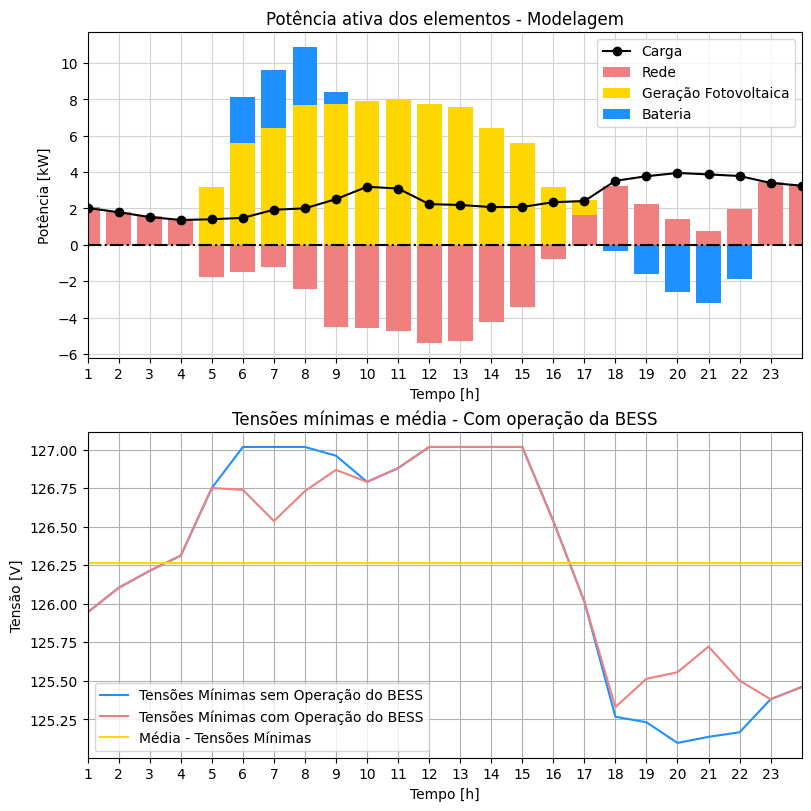

In [ ]:
#______________________________________________________________________________#
#                        GRÁFICOS - OPERAÇÃO MODELAGEM                         #
#______________________________________________________________________________#

fig, axs = plt.subplots(2, figsize=(8, 8), constrained_layout = True)
#fig = plt.figure(figsize=(10,60))

axs[0].axhline(y=0, color='k', linestyle='-.')
axs[0].grid(color='lightgrey')
axs[0].plot(horas, carga_kw, color='k', marker='o', label='Carga')
axs[0].bar(horas, circuit_kw , color='lightcoral', label='Rede')
axs[0].bar(horas, -pv6_kw , bottom = (circuit_kw/2)+abs(circuit_kw)/2, color='gold', label='Geração Fotovoltaica')
axs[0].bar(horas, bateria_kw , bottom = -pv6_kw, color='dodgerblue', label='Bateria')
axs[0].set_title('Potência ativa dos elementos - Modelagem')
axs[0].set_xlabel('Tempo [h]')
axs[0].set_ylabel('Potência [kW]')
axs[0].set_xticks(np.arange(1, 24, 1))
axs[0].set_xlim([1,24])
axs[0].legend(loc=1)
axs[0].set_axisbelow(True)

axs[1].grid()
axs[1].plot(horas, tensoes_minimas, color='dodgerblue', label = 'Tensões Mínimas sem Operação do BESS')
axs[1].plot(horas, tensoes_minimas_m, color='lightcoral', label = 'Tensões Mínimas com Operação do BESS')
axs[1].axhline(y=Vmed, color='gold', linestyle='-', label='Média - Tensões Mínimas')
axs[1].set_title('Tensões mínimas e média - Com operação da BESS')
axs[1].set_xlabel('Tempo [h]')
axs[1].set_ylabel('Tensão [V]')
axs[1].set_xticks(np.arange(1, 24, 1))
axs[1].set_xlim([1,24])
axs[1].legend()
axs[1].set_axisbelow(True)


# Experimento

126.16000000000001
5.263157894736842 1.3368983957219251


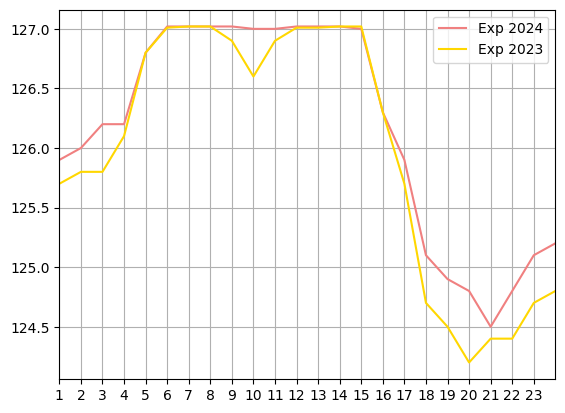

In [ ]:
exp2024 = [125.9,126.0,126.2,126.2,126.8,127.02,127.02,127.02,127.02,127.0,127.0,127.02,127.02,127.02,127.0,126.3,125.9,125.1,124.9,124.8,124.5,124.8,125.1,125.2]
exp2023 = [125.7,125.8,125.8,126.1,126.8,127.01,127.02,127.02,126.9,126.6,126.9,127.01,127.01,127.02,127.02,126.3,125.7,124.7,124.5,124.2,124.4,124.4,124.7,124.8]
plt.plot(horas, exp2024, color = 'lightcoral', label = 'Exp 2024')
plt.plot(horas, exp2023, color = 'gold', label = 'Exp 2023')
plt.grid()
plt.xticks(np.arange(1, 24, 1))
plt.xlim([1,24])
plt.legend()
print(np.average(exp2024))

print((1/kc), (1/kd))
